# Estimate a stationary covariance function

The objective here is to estimate a stationary covariance model from data.

The library builds an estimation of the stationary covariance function on a *ProcessSample* or *TimeSeries* using the previous algorithm implemented in the *StationaryCovarianceModelFactory* class. The result consists in a *UserDefinedStationaryCovarianceModel* which is easy to manipulate.

Such an object is composed of a time grid and a collection of $K$ square matrices of dimension d. $K$ corresponds to the number of time steps of the final time grid on which the covariance is estimated. When estimated from a time series , the *UserDefinedStationaryCovarianceModel* may have a time grid different from the initial time grid of the time series.


In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# Create some 1-d normal process data with an Exponential covariance model

# Dimension parameter
dim = 1

# Create the time grid
t0 = 0.0
N = 300
t1 = 20.0
dt = (t1 - t0) / N
tgrid = ot.RegularGrid(t0, dt, N)

# Create the covariance model
amplitude = [1.0] * dim
scale = [1.0] * dim
covmodel = ot.ExponentialModel(scale, amplitude)

# Create a stationary Normal process with that covariance model
process = ot.GaussianProcess(covmodel, tgrid)

# Create a time series and a sample of time series
tseries = process.getRealization()
sample = process.getSample(1000)

In [13]:
# Build a factory of stationary covariance function
covarianceFactory = ot.StationaryCovarianceModelFactory()

# Set the spectral factory algorithm
segmentNumber = 5
spectralFactory = ot.WelchFactory(ot.Hanning(), segmentNumber)
covarianceFactory.setSpectralModelFactory(spectralFactory)

# Check the current spectral factory
print(covarianceFactory.getSpectralModelFactory())

class=WelchFactory window = class=FilteringWindows implementation=class=Hanning blockNumber = 5 overlap = 0.5


In [14]:
# Case 1 :  Estimation on a ProcessSample

# The spectral model factory computes the spectral density function
# without using the block and overlap arguments of the Welch factories
estimatedModel_PS = covarianceFactory.build(sample)

# Case 2 :  Estimation on a TimeSeries

# The spectral model factory compute the spectral density function using
# the block and overlap arguments of spectral model factories
estimatedModel_TS = covarianceFactory.build(tseries)

# Evaluate the covariance function at each time step
# Care : if estimated from a time series, the time grid has changed
for i in range(N):
    tau = tgrid.getValue(i)
    cov = estimatedModel_PS(tau)

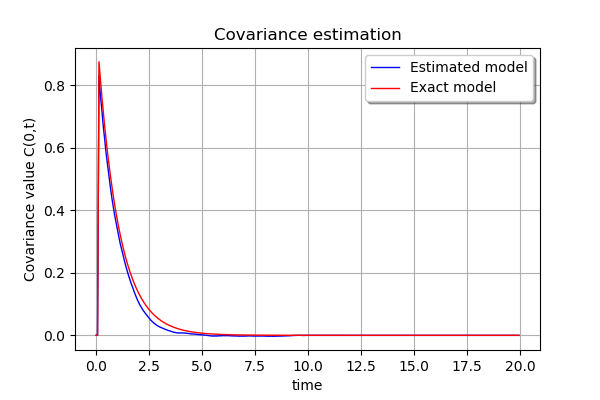

In [12]:
# Drawing...
sampleValueEstimated = ot.Sample(N, 1)
sampleValueModel = ot.Sample(N, 1)
for i in range(N):
    t = tgrid.getValue(i)
    for j in range(i - 1):
        s = tgrid.getValue(j)
        estimatedValue = estimatedModel_PS(t, s)
        modelValue = covmodel(t, s)
        if j == 0:
            sampleValueEstimated[i, 0] = estimatedValue[0, 0]
            sampleValueModel[i, 0] = modelValue[0, 0]
sampleT = tgrid.getVertices()
graph = ot.Graph('Covariance estimation', 'time', 'Covariance value C(0,t)', True)
curveEstimated = ot.Curve(sampleT, sampleValueEstimated, 'Estimated model')
graph.add(curveEstimated)
curveModel = ot.Curve(sampleT, sampleValueModel, 'Exact model')
curveModel.setColor('red')
graph.add(curveModel)
graph.setLegendPosition('topright')
graph